# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [284]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from scipy.stats import multivariate_normal as mvn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [285]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single n-dimensional array of predictions)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [286]:
irisdata = load_iris()

(X_train, X_test, y_train, y_test) = train_test_split(irisdata.data, irisdata.target, test_size=0.3, train_size=0.7)
irisdata.data = X_train
irisdata.target = y_train
irisdata.verification_data = X_test
irisdata.verification_target = y_test


print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

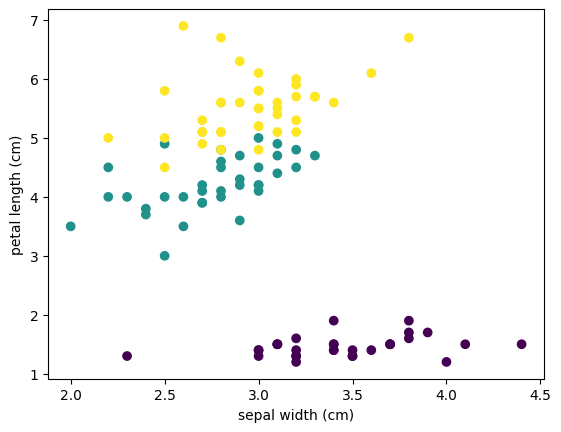

In [287]:
feat1 = 1
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

In [288]:
irisknn = KNeighborsClassifier(n_neighbors=3)


irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


KNeighborsClassifier(n_neighbors=3)

The following defines three different linear models: Linear regression is the same as 'Least squares regression on the slides of the first lecture; logistic regression and linear support vector machine will be studied in more detail in the following lectures. For now we need to know that for each of the models we first specify the desired model class, and then fit (or 'train', or 'learn') the model based on our labeled training data. The linear regression model requires the label information in a different format from the other two models, which is why we first construct the 'one hot encoding' representation. After the models have been fitted, they each define a linear decision boundary, and can classify unlabeled examples. 

In [289]:
onehotclasses = np.zeros((irisdata.target.size,5))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0


irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

irislogreg = LogisticRegression()
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

irislinsvc = SVC(kernel='linear')
irislinsvc.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


SVC(kernel='linear')

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or one of the linear models).


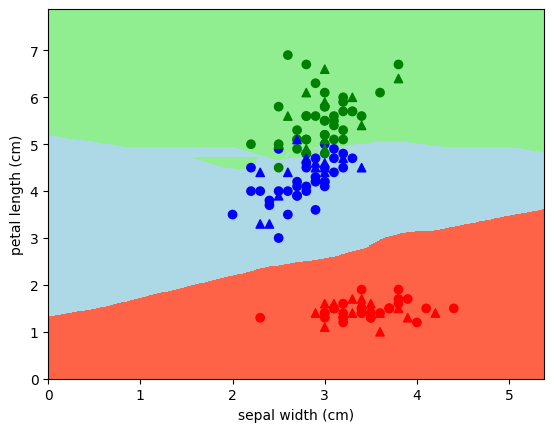

In [290]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

# maxval1 = np.max(irisdata.verification_data[:,feat1])
# maxval2 = np.max(irisdata.verification_data[:,feat2])


xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

# Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = maxpos(Z)

#Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])
#meshclasses = Z

#Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()])
#meshclasses = Z


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.scatter(irisdata.verification_data[:,feat1],irisdata.verification_data[:,feat2],c=irisdata.verification_target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']), marker="^")
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 1** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features. This does not require any extension of the code.

**Feat 1,2**
Nearest neighbor: The shape of the decision boundaries is different from linear regression and does not look linear.

Linear regression: We get three lines which seperate each class clearly. 

**Feat 0,1**
Nearest neighbor: The points are on top of each other but the decision boundaries are more accurate (may lead to overfitting).

Linear regression: Since there are only three lines to seperate the decision boundaries, the classification is not very accurate as the data points are on top of each other.

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

In [291]:
knnpredict = irisknn.predict(irisdata.verification_data[:,[feat1,feat2]])

# accuracy_score(irisdata.target, knnpredict)
accuracy_score(irisdata.verification_target, knnpredict)



0.9555555555555556

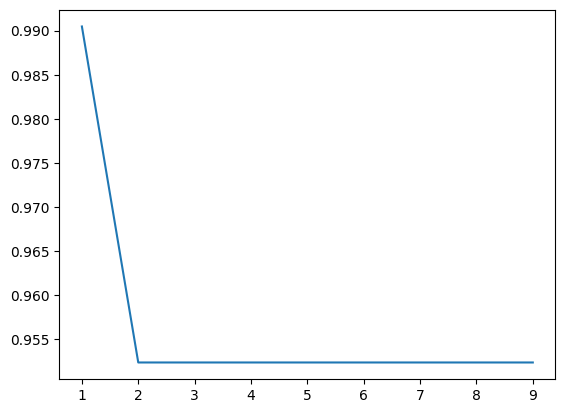

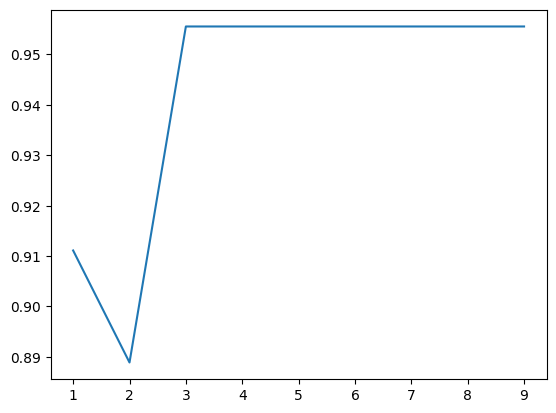

[0.9904761904761905, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523]
[0.9111111111111111, 0.8888888888888888, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


In [292]:
train_acc = []
test_acc = []
k_max = 10

for i in range(1,k_max):
    irisknn = KNeighborsClassifier(n_neighbors=i)
    irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

    prediction = irisknn.predict(irisdata.data[:,[feat1,feat2]])
    accuracy = accuracy_score(irisdata.target, prediction)
    train_acc.append(accuracy)

for i in range(1,k_max):
    irisknn = KNeighborsClassifier(n_neighbors=i)
    irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

    prediction = irisknn.predict(irisdata.verification_data[:,[feat1,feat2]])
    accuracy = accuracy_score(irisdata.verification_target, prediction)
    test_acc.append(accuracy)

plt.plot(range(1,k_max), train_acc)
plt.show()

plt.plot(range(1,k_max), test_acc)
plt.show()


print(train_acc)
print(test_acc)

**Exercise 3:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

In [293]:
for i in range(1,k_max):
    irisknn = KNeighborsClassifier(n_neighbors=i)
    irisknn.fit(irisdata.data,irisdata.target)

    prediction = irisknn.predict(irisdata.verification_data)
    accuracy = accuracy_score(irisdata.verification_target, prediction)
    test_acc.append(accuracy)

test_acc

[0.9111111111111111,
 0.8888888888888888,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Finally, we revisit Exercise 2 from the first exercise sheet. We construct a dataset that is linearly separable, but may invite overfitting:

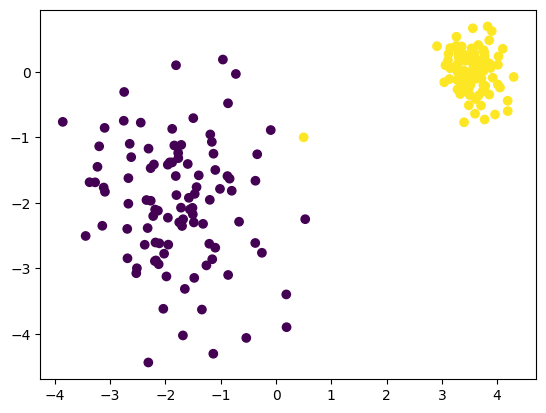

In [294]:
gauss1= mvn(mean=(-2,-2),cov=((1,0),(0,1))).rvs(random_state=1,size=100)
gauss2= mvn(mean=(3.5,0),cov=((0.1,0),(0,0.1))).rvs(random_state=1,size=100)
X=np.vstack([gauss1,gauss2])
X=np.vstack([X,(0.5,-1)])
Y=np.hstack([np.zeros(100),np.ones(101)])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

Prepare a meshgrid for the visualization of decision regions:


In [295]:
leftx=np.min(X[:,0])-0.5
rightx=np.max(X[:,0])+0.5
lefty=np.min(X[:,1])-0.5
righty=np.max(X[:,1])+0.5

xx, yy = np.meshgrid(np.arange(leftx, rightx, 0.02), np.arange(lefty, righty, 0.02))


**Exercise 4**: What classifiers can you construct that appear to overfit by classifying the yellow outlier point as belonging to the yellow class? What other classifiers classify this point as purple?

KNN with k = 1 will overfit. 
KNN with k > 1 will classify it as purple